# RSF spring-block simulations

In this tutorial, we'll run a series of spring-block (1D fault) simulations with the classical rate-and-state friction framework. We start by importing the necessary libraries:

In [1]:
# Make plots interactive in the notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

import os
import sys

# Add QDYN source directory to PATH
# Go up in the directory tree
upup = [os.pardir]*2
qdyn_dir = os.path.join(*upup)
# Get QDYN src directory
src_dir = os.path.abspath(
    os.path.join(
        os.path.join(os.path.abspath(""), qdyn_dir), "src")
)
# Append src directory to Python path
sys.path.append(src_dir)

# Import QDYN wrapper
from pyqdyn import qdyn

The simulation parameters are accessible after instantiation of the QDYN class as a Python dictionary object. We first define a number of global simulation parameters:

In [2]:
# Instantiate the QDYN class object
p = qdyn()

# Get the settings dict
set_dict = p.set_dict

# Global simulation parameters
set_dict["MESHDIM"] = 0        # Simulation dimensionality (spring-block)
set_dict["TMAX"] = 300         # Maximum simulation time [s]
set_dict["NTOUT"] = 100        # Save output every N steps
set_dict["V_PL"] = 1e-5        # Load-point velocity [m/s]
set_dict["MU"] = 2e9           # Shear modulus [Pa]
set_dict["SIGMA"] = 5e6        # Effective normal stress [Pa]
set_dict["ACC"] = 1e-7         # Solver accuracy
set_dict["SOLVER"] = 2         # Solver type (Runge-Kutta)

# To switch to rate-and-state friction ("RSF")
set_dict["FRICTION_MODEL"] = "RSF"

We then overwrite the default values of specific rheological parameters:

In [3]:
set_dict["SET_DICT_RSF"]["RNS_LAW"] = 0               # Classical rate-and-state
set_dict["SET_DICT_RSF"]["THETA_LAW"] = 1             # Ageing law
set_dict["SET_DICT_RSF"]["A"] = 0.01                  # Direct effect parameter [-]
set_dict["SET_DICT_RSF"]["B"] = 0.015                 # Evolution effect parameters [-]
set_dict["SET_DICT_RSF"]["DC"] = 1e-5                 # Characteristic slip distance [m]
set_dict["SET_DICT_RSF"]["V_SS"] = set_dict["V_PL"]   # Reference velocity [m/s]

# Initial slip velocity [m/s]
set_dict["SET_DICT_RSF"]["V_0"] = 1.01 * set_dict["V_PL"]
# Initial state [s]
set_dict["SET_DICT_RSF"]["TH_0"] = set_dict["SET_DICT_RSF"]["DC"] / set_dict["V_PL"]

Lastly, we pass the settings to the QDYN wrapper, generate the mesh (only 1 element) and write the `qdyn.in` input file:

In [4]:
p.settings(set_dict)
p.render_mesh()
p.write_input()

True

The `p.write()` command writes a `qdyn.in` file to the current working directory, which is read by QDYN at the start of the simulation. To do this, call `p.run()`. Note that in this notebook, the screen output (`stdout`) is captured by the console, so you won't see any output here.

In [5]:
p.run()

0

The simulation output is read and processed by the wrapper using:

In [6]:
p.read_output()

True

The simulation time series output is then stored as a pandas `DataFrame` in `p.ot`. To inspect the first 10 entries:

In [7]:
p.ot.head(10)

,t,loc_size,crack_size,potcy,pot_rate,v,theta,v_theta_dc,tau,slip,x_max,v_max,theta_max,omeg_max,tau_max,slip_max,sigma_max
0,0.588016,0.0,0.0,0.000006,0.00001,0.00001,0.994082,1.009890,3000340.0,0.000006,0.0,0.00001,0.994082,1.009890,3000340.0,0.000006,5000000.0
1,1.075450,0.0,0.0,0.000011,0.00001,0.00001,0.989507,1.008720,3000170.0,0.000011,0.0,0.00001,0.989507,1.008720,3000170.0,0.000011,5000000.0
2,1.562065,0.0,0.0,0.000016,0.00001,0.00001,0.985738,1.006630,2999970.0,0.000016,0.0,0.00001,0.985738,1.006630,2999970.0,0.000016,5000000.0
3,2.047883,0.0,0.0,0.000021,0.00001,0.00001,0.983182,1.003780,2999760.0,0.000021,0.0,0.00001,0.983182,1.003780,2999760.0,0.000021,5000000.0
4,2.535602,0.0,0.0,0.000026,0.00001,0.00001,0.982145,1.000410,2999570.0,0.000026,0.0,0.00001,0.982145,1.000410,2999570.0,0.000026,5000000.0
5,3.040719,0.0,0.0,0.000031,0.00001,0.00001,0.982870,0.996713,2999400.0,0.000031,0.0,0.00001,0.982870,0.996713,2999400.0,0.000031,5000000.0
6,3.592630,0.0,0.0,0.000037,0.00001,0.00001,0.985762,0.992882,2999280.0,0.000037,0.0,0.00001,0.985762,0.992882,2999280.0,0.000037,5000000.0
7,4.061445,0.0,0.0,0.000041,0.00001,0.00001,0.989763,0.990157,2999250.0,0.000041,0.0,0.00001,0.989763,0.990157,2999250.0,0.000041,5000000.0
8,4.529313,0.0,0.0,0.000046,0.00001,0.00001,0.994860,0.988200,2999280.0,0.000046,0.0,0.00001,0.994860,0.988200,2999280.0,0.000046,5000000.0
9,4.973531,0.0,0.0,0.000050,0.00001,0.00001,1.000350,0.987229,2999370.0,0.000050,0.0,0.00001,1.000350,0.987229,2999370.0,0.000050,5000000.0


To see the behaviour of our spring-block fault, we can plot the time series of (normalised) shear stress, state, and slip velocity:

<IPython.core.display.Javascript object>


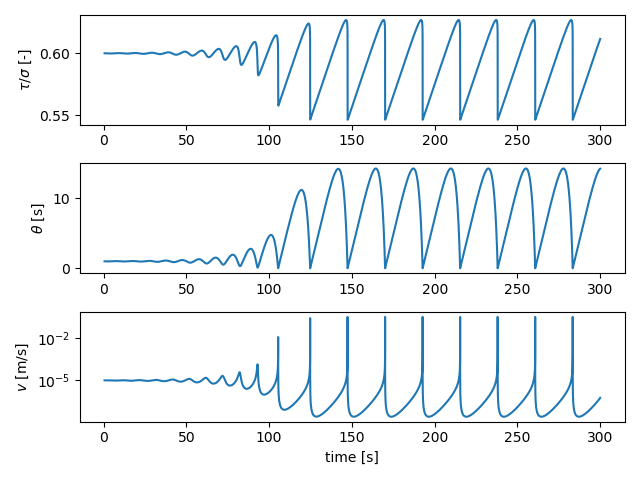

In [8]:
plt.figure()

# Normalised shear stress
plt.subplot(311)
plt.plot(p.ot["t"], p.ot["tau"] / set_dict["SIGMA"])
plt.ylabel(r"$\tau / \sigma$ [-]")

# State
plt.subplot(312)
plt.plot(p.ot["t"], p.ot["theta"])
plt.ylabel(r"$\theta$ [s]")

# Velocity
plt.subplot(313)
plt.plot(p.ot["t"], p.ot["v"])
plt.yscale("log")
plt.ylabel(r"$v$ [m/s]")
plt.xlabel("time [s]")

plt.tight_layout()
plt.show()